In [41]:
#Python Initiation
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline
import pandas as pd
import ipywidgets as widgets
import time
import math
from IPython.display import display

#Graph Formatting
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 14
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
Res=100 #Resoultion of the calulations

#Graph Font Edit
font = {'family':'Times New Roman',
        'weight' : 'bold',
        'size'   : 22}
matplotlib.rc('font', **font)


#Homework 5
##Plot Figure 3.5 for k=1.2 and an epsilon of 50.

##Plot Figure 3.6 for k=1.2 and P1/P3=100.

##Complete Example 3.2 and recreate Figure 3.3 using the information from Example 3.2

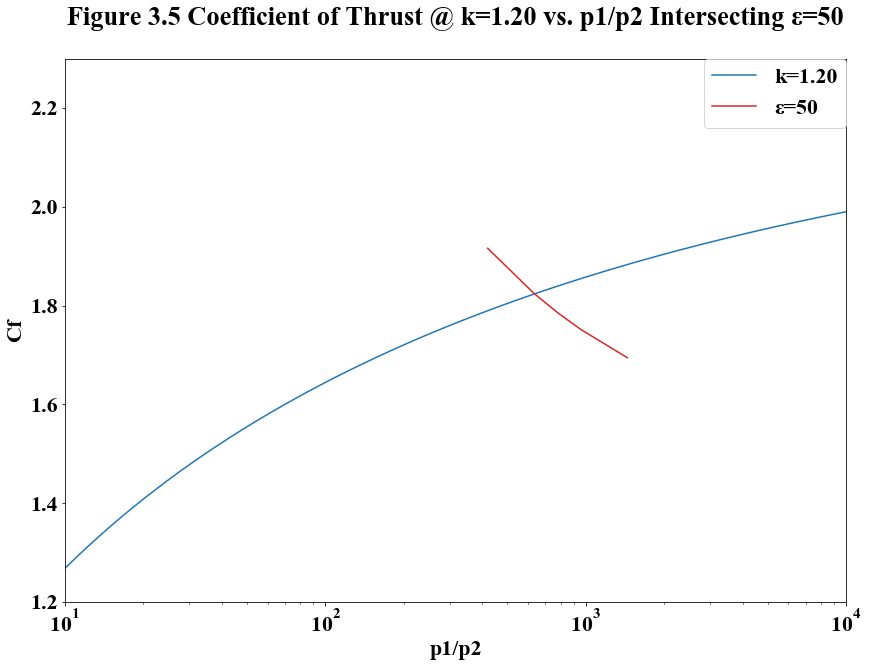

In [42]:
#Homework 5

    #Figure 3.5
    
def CfIdeal(k,p2p1):
        Cf=(((2*k**2)/(k-1))*(2/(k+1))**((k+1)/(k-1))*(1-(p2p1)**((k-1)/k)))**0.5
        return Cf
def AreaRatio(k,p2p1):
        AR=((k+1)/2)**(1/(k-1))*(p2p1)**(1/k)*(((k+1)/(k-1))*(1-p2p1**((k-1)/k)))**0.5
        AR=AR**-1
        return AR
def FindEpsln(numbers,eps):   
         numbers = np.asarray(numbers) 
         i=(np.abs(numbers - eps)).argmin() 
         return numbers[i]  

        
#Given
k=1.20
Epsln=50
p1p2=np.arange(10.0,10000.1,0.1)
p2p1=p1p2**-1
Cf=CfIdeal(k,p2p1)
        
        
Cfcoords=[]
Pcoords=[]
        
for K in(1.1,1.2,1.25,1.3,1.4):
    AR=AreaRatio(K,p2p1)
    AR=AR.tolist()
    Cfcoords.append(CfIdeal(K,p2p1[AR.index(FindEpsln(AR,50))]))
            
for K in(1.1,1.2,1.25,1.3,1.4):
    AR=AreaRatio(K,p2p1)
    AR=AR.tolist()
    Pcoords.append(p1p2[AR.index(FindEpsln(AR,50))])
#Plotting the Graph
fig = plt.subplots()
color = 'tab:green'
plt.plot(p1p2,Cf, color='tab:blue',label='k=1.20')
plt.plot(Pcoords,Cfcoords,color='tab:red',label='ε=50')
plt.legend(loc='upper left', borderaxespad=0.) #Showing the Graph Legend
plt.xlabel('p1/p2')
plt.ylabel('Cf')
plt.legend(loc='best', borderaxespad=0.) #Showing the Graph Legend
plt.xlim([10,10000])#Setting the range for the x-axis
plt.xscale('log')
plt.ylim([1.2,2.3])
plt.title('Figure 3.5 Coefficient of Thrust @ k=1.20 vs. p1/p2 Intersecting ε=50\n')
plt.show()

#Example 3.2

###A rocket propulsion system operates near sea level with a chamber pressure of p1 = 2.068 MPa or 300 psia, a chamber temperature of 2222 K, and a propellant consumption of ṁ = 1.0 kg∕sec. Take k = 1.30 and R = 345.7 J∕kg − K. Calculate the ideal thrust and the ideal specific impulse. Also plot the cross-sectional area A, the local velocity 𝑣, the specific volume V, the absolute temperature T, and the local Mach number M with respect to pressure along the nozzle.

1827.0365931481972
186.24226229849103


C:\Users\Jack House\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide


IndexError: index 2 is out of bounds for axis 1 with size 2

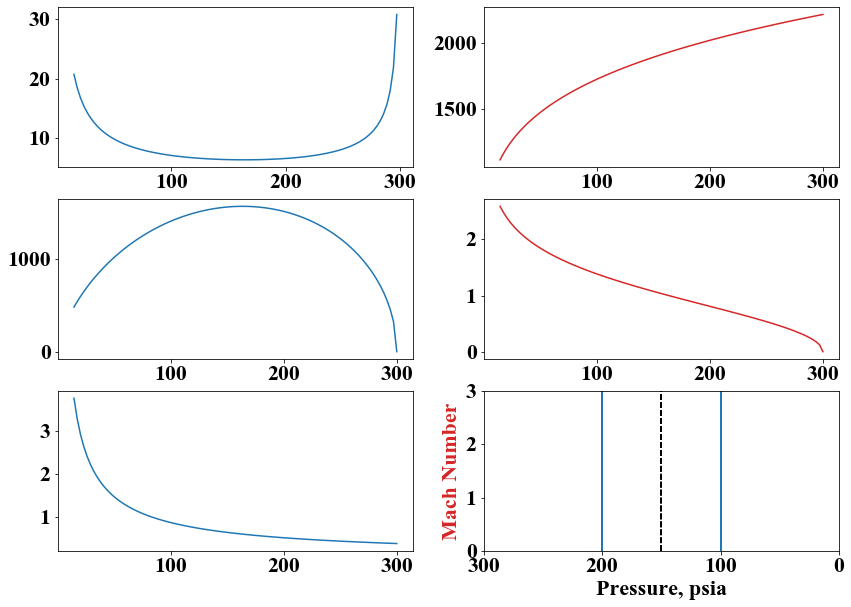

In [43]:
#Example 3.2

#Definitions

def IdealExitVelocity (k,R,T1,PR):
    v2=np.sqrt(((2*k)/(k-1))*R*T1*(1-(PR)**((k-1)/k)))
    return v2

#Given
P1=2068000 #Chamber Pressure | Pa
T1=2222    #Chamber Pressure | ⁰K
mdot=1.0   #Propellant consumption | kg/sec
k=1.30     #Specific Heat Ratio
R=345.7    #Universial Heat Constant | J/kg-K
go=9.81    #Gravitational Constant | m/sec^2

#Calculations
P3=101300                               #Sea-level Pressure | Pa
PR=0.049                                #Pressure Ratio | P2/P1
v2=IdealExitVelocity(k,R,T1,PR)
c=v2                                    #P2=P3, Effective Exhaust Velocity | m/sec
Isp=c/go                                #Specific Impulse | Sec
V1=R*(T1/P1)                            #Initial Specific Volume | m^3/kg
Py=np.linspace(2068000,101300,100)         #Range of Pressure between 2.068-0.1013 MPA | Pa
Vy=V1*(P1/Py)**(1/k)                    #Specific Volume as function of Py | m^3/kg
Ty=T1*(Py/P1)**((k-1)/k)                 #Temperature as function of Py | K
υy=2580*np.sqrt(1-(Py/P1)**((k-1)/k))   #Velocity as function of Py |m/sec
Ay=mdot*(Vy/υy)                         #Cross-Sectional Area | m^2
My=υy/np.sqrt(k*R*Ty)                   #Mach Number | Unitless

#Conversions
Py1=Py*0.000145038                      #Converting Pa to psia
Ay1=Ay*100*100                          #Converting m^2 to cm^2

#Outputs
print(v2)
print(Isp)

fig, axs = plt.subplots(3, 2)
#Plot of Pressure and Area
color='tab:blue'
axs[0,0].plot(Py1,Ay1,color=color)
plt.xlim([300,0.0])#Pressure Ratio | k=1.2
plt.ylim([0.0,25])
plt.axvline(x=200)
plt.axvline(x=150, color='k', linestyle='--')
plt.axvline(x=100)
plt.xlabel('Pressure, psia')
plt.ylabel('Area, cm^2', color=color)


#Plot of Pressure and Velocity over Specific Volume
color='tab:blue'
axs[1,0].plot(Py1,υy/Vy,color=color)
plt.xlim([300,0.0])#Pressure Ratio | k=1.2
plt.ylim([0.0,5000])
plt.axvline(x=200)
plt.axvline(x=150, color='k', linestyle='--')
plt.axvline(x=100)
plt.xlabel('Pressure, psia')
plt.ylabel('Velocity over Specific Volume, kg/sec-m^2', color=color)


#Plot of Pressure and Specific Volume
color='tab:blue'
axs[2,0].plot(Py1,Vy,color=color)
plt.xlim([300,0.0])#Pressure Ratio | k=1.2
plt.ylim([0.0,5])
plt.axvline(x=200)
plt.axvline(x=150, color='k', linestyle='--')
plt.axvline(x=100)
plt.xlabel('Pressure, psia')
plt.ylabel('Specific Volume, m^3/kg', color=color)


#Plot of Pressure and Temperature
color='tab:red'
axs[0,1].plot(Py1,Ty,color=color)
plt.xlim([300,0.0])                       #Pressure Limit | psia
plt.ylim([1100,2222])                      #Mach Number Limit
plt.axvline(x=200)
plt.axvline(x=150, color='k', linestyle='--')
plt.axvline(x=100)
plt.xlabel('Pressure, psia')
plt.ylabel('Temperature, ⁰K', color=color)

#Plot of Pressure and Mach Number
color='tab:red'
axs[1,1].plot(Py1,My,color=color)
plt.xlim([300,0.0])                       #Pressure Limit | psia
plt.ylim([0.0,3.0])
plt.axvline(x=200)
plt.axvline(x=150, color='k', linestyle='--')
plt.axvline(x=100)
plt.xlabel('Pressure, psia')
plt.ylabel('Mach Number', color=color)


#Plot of Pressure and Velocity
color='tab:red'
axs[2,2].plot(Py1,υy,color=color)
plt.xlim([300,0.0])#Pressure Ratio | k=1.2
plt.ylim([0.0,1820])
plt.axvline(x=200)
plt.axvline(x=150, color='k', linestyle='--')
plt.axvline(x=100)
plt.xlabel('Pressure, psia')
plt.ylabel('Velocity, m/sec', color=color)


